In [1]:
from whisperweranalysis.structure import LJSpeech
from whisperweranalysis.groundtruth import lj_valid
from whisperweranalysis.wer import compute

In [2]:
from whisperweranalysis.mel_utilities import audio2mel

In [3]:
# audio2mel()

In [4]:
%load_ext autoreload
%autoreload 2

## Natural Speech

In [5]:
GT = LJSpeech.load_from_dir('../whisperweranalysis/LJ_Valid_transcription/NS/0')

In [6]:
compute(lj_valid, GT.transcriptions), GT.compute_wer(lj_valid)

(2.1778584392014517, 2.1778584392014517)

## Vocoded Speech

In [7]:
GT_Mel = LJSpeech.load_from_dir('../whisperweranalysis/LJ_Valid_transcription/VOC/0')

In [8]:
compute(lj_valid, GT_Mel.transcriptions)

2.238354506957048

In [9]:
with open('temp_NS.txt', 'w') as f:
    f.writelines([f'{x}\n' for x in GT.transcriptions])
    
with open('temp_NS_Vocoded.txt', 'w') as f:
    f.writelines([f'{x}\n' for x in GT_Mel.transcriptions])
    

## Plotting time

In [10]:
from collections import defaultdict
from pathlib import Path
from whisperweranalysis.checkpoint_mover import get_list_iter

In [11]:
TRANS_DIR = Path('../whisperweranalysis/LJ_Valid_transcription')

In [12]:
all_systems = defaultdict(lambda: defaultdict(int))
for system in TRANS_DIR.glob('*'):
    for iter_ in sorted(list(system.glob('*')), key=lambda x: int(x.name)):
        lj_struct = LJSpeech.load_from_dir(iter_)
        lj_struct.compute_wer(lj_valid)
        all_systems[system.name][int(iter_.name)] = lj_struct.wer
        # if int(iter_.name) > 50000:
        #     break
        
all_systems['VOC_500'] = { x: list(all_systems['VOC'].values())[0] for x in all_systems['Tacotron2_500']}

In [13]:
all_systems.keys()

dict_keys(['VOC', 'Tacotron2', 'Tacotron2_500', 'OverFlow', 'OverFlow_500', 'FastPitch', 'NH2', 'Glow_500', 'Glow', 'VITS', 'NS', 'VOC_500'])

In [14]:

systems = {
    'T2': all_systems['Tacotron2'],
    'GTTS': all_systems['Glow'],
    'NHMM': all_systems['NH2'],
    'OF': all_systems['OverFlow'],
    'VOC': all_systems['VOC'],
    'VITS': all_systems['VITS'],
    "FP": all_systems['FastPitch']
}

systems_500 = {
    'T2 (500)': all_systems['Tacotron2_500'],
    'GTTS (500)': all_systems['Glow_500'],
    'OF (500)': all_systems['OverFlow_500'],
    'VOC_500': all_systems['VOC_500']
}

y_values, legend_labels = [], []
for model in systems:
    y_values.append([v for k, v in systems[model].items() if k <= 100000])
    legend_labels.append(model)
    
x = sorted(list(get_list_iter()))


y_values_500, legend_labels_500 = [], []
for model in systems_500:
    y_values_500.append([v for k, v in systems_500[model].items()])
    legend_labels_500.append(model)

x_500 = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000, 7000, 8000, 9000, 10000]

In [15]:
all_systems.keys()

dict_keys(['VOC', 'Tacotron2', 'Tacotron2_500', 'OverFlow', 'OverFlow_500', 'FastPitch', 'NH2', 'Glow_500', 'Glow', 'VITS', 'NS', 'VOC_500'])

In [16]:
all_systems['FastPitch']

defaultdict(int,
            {0: 99.87900786448881,
             500: 99.87900786448881,
             1000: 100.0,
             1500: 100.0,
             2000: 99.87900786448881,
             2500: 99.8185117967332,
             5000: 99.75801572897761,
             10000: 100.0,
             15000: 101.4519056261343,
             20000: 99.87900786448881,
             25000: 99.87900786448881,
             30000: 100.0,
             40000: 100.0,
             50000: 103.145795523291,
             60000: 99.87900786448881,
             70000: 99.75801572897761,
             80000: 99.87900786448881,
             90000: 100.42347247428918,
             100000: 99.75801572897761,
             120000: 98.97156684815486,
             140000: 20.75015124016939,
             160000: 5.202661826981246,
             180000: 3.4482758620689653,
             190000: 3.508771929824561})

In [17]:
print(x)

[0, 500, 1000, 1500, 2000, 2500, 5000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000]


In [26]:
x = x[:19]

/home/smehta/Projects/whisper-analysis-plots/whisperweranalysis/plotting/line.py:191: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim)
/home/smehta/Projects/whisper-analysis-plots/whisperweranalysis/plotting/line.py:192: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(ylim)
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Ne

findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not fou

findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not fou

findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not fou

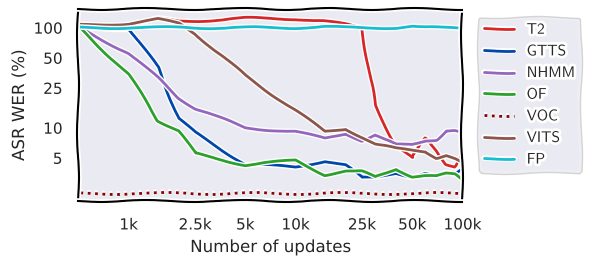

In [29]:
from whisperweranalysis.plotting.line import plot_lines
import matplotlib.pyplot as plt

x_ticks = [0, 1000, 2500, 5000, 10000, 25000, 50000, 100000]
x_tick_labels = ['0', '1k', '2.5k', '5k', '10k', '25k', '50k', '100k']
y_ticks = [5, 10, 25, 50, 100]
y_tick_labels = ['5', '10', '25', '50', '100']
plot_colors = ['#d62728', '#0047AB','#9467bd', '#2ca02c', '#8b0000', '#8c564b', '#17becf'] #, '#d62728', '#0047AB', '#2ca02c', ]
line_format = ['-', '-', '-', '-', ':', '-', '-'] # '--', '--', '--']
aspect_ratio = (2, 1)
output_filename = 'asr_wer.pdf'
plot_log_x = True
plot_log_y = True
xlim = (0, 100000)
with plt.xkcd():
    plot_lines([x], y_values, 
               x_label='Number of updates',
               y_label='ASR WER (%)', 
               legend_label=legend_labels,
               line_format=line_format,
               plot_colors=plot_colors,
               aspect_ratio=aspect_ratio,
               x_ticks=x_ticks,
               x_tick_labels=x_tick_labels,
               y_ticks=y_ticks,
               y_tick_labels=y_tick_labels,
               file_name=output_filename,
               plot_log_x=plot_log_x,
               plot_log_y=plot_log_y,
               xlim=xlim,

    )

In [237]:
# from whisperweranalysis.plotting.line import plot_lines
# x_ticks = [0, 1000, 2500, 5000, 8000, 10000]
# x_tick_labels = ['0', '1k', '2.5k', '5k', '8k', '10k']
# y_ticks = [5, 10, 25, 50, 100]
# y_tick_labels = ['5', '10', '25', '50', '100']
# plot_colors = ['#d62728', '#0047AB', '#2ca02c', '#8b0000'] #, '#d62728', '#0047AB', '#2ca02c', ]
# line_format = ['-', '-', '-', ':'] # '--', '--', '--']
# aspect_ratio = (2, 1)
# output_filename = 'asr_wer.pdf'
# plot_log_x = True
# plot_log_y = True
# xlim = (0, 100000)

# plot_lines([x_500], y_values_500, 
#            x_label='Number of updates',
#            y_label='ASR WER (%)', 
#            legend_label=legend_labels_500,
#            line_format=line_format,
#            plot_colors=plot_colors,
#            aspect_ratio=aspect_ratio,
#            x_ticks=x_ticks,
#            x_tick_labels=x_tick_labels,
#            y_ticks=y_ticks,
#            y_tick_labels=y_tick_labels,
#            file_name=output_filename,
#            plot_log_x=plot_log_x,
#            plot_log_y=plot_log_y,
#            xlim=xlim,
           
# )